# Finding the Best Market to Advertise in an E-learning Product 

The goal of this project is to find out the two best markets to advise courses on programming offered by an e-learning company.
Most of these courses are on web and mobile development, but there are also others covering many other domains, like data science, game development, etc.
To accomplish this task we will first consider the **countries where there is a high percentage of new coders**, for those countries we will look at **how much new coders are willing to spend on learning** and finally we will evaluate the right **trede-off between percentage of new coders and their availability on spending money for imrpoving their skills** in order to find at least two markets to advertise our e-learning product.    

### Summary of the Results

**United State of America** is one of the best market to advertise in courses on programming offered by an e-learning company. 
With respect to the second market it is not as clear as for the first one, however **India** seems the second country were one can advertise an e-learning product.
**In any case given the important gap in the percentage of new coders between India and US we should probably split the advertising budget unequally (e.g. 70% in the US and 30% in India)**. 


## Explore existing dataset to avoid preparing new survey 

In order to address the problem of identifing the best market to advice our corses, we could in principle prepare a survey which is in general quite costly. Another idea is to use dataset already prepared where one can extract useful information also for purpose different from the ones strictly related to that dataset. One interesting dataset that can be used in our case is the  [freeCodeCamp's 2017 New Coder Survey. freeCodeCamp](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969).

Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

In [1]:
# Imports
import os
import pandas as pd
import json
import matplotlib
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
import warnings

# Set some useful options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

In [2]:
# read dataset
df = pd.read_csv ('2017-fCC-New-Coders-Survey-Data.csv')

In [3]:
# quickly check of the dataset
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Is the data sample representative of the population of interest?

Once the dataframe has been imported, an important question to answer is related to how well the sample data we are using is representative of the *population* of interest in our analysis. We would like to offer courses on web and mobile development as well as data science, game development etc. So first of all let us evaluate the job roles which are preferred by the participants of the survey, reported in the *'JobRoleInterest'* column.

In [4]:
# Remove null values in 'JobRoleInterest' column
df = df[pd.notnull(df['JobRoleInterest'])].copy()

# Normalized frequency table for 'JobRoleInterest'
jobs = df['JobRoleInterest'].value_counts(normalize = True).to_frame()

In [5]:
jobs.head(100)

,JobRoleInterest
Full-Stack Web Developer,0.117706
Front-End Web Developer,0.064359
Data Scientist,0.021739
Back-End Web Developer,0.020309
Mobile Developer,0.016733
Game Developer,0.016304
Information Security,0.013158
"Full-Stack Web Developer, Front-End Web Developer",0.009153
"Front-End Web Developer, Full-Stack Web Developer",0.008009
Product Manager,0.007866


From the previous bar plot and frequency table it is possible to find out that the most requested job type is the Full-Stack Web Developer followed by the Front-End Web Developer. Indeed these job types alone are requested by more than 6% of the participants. This fits with the focus of our course that is on web and mobile development, although other domains are covered too. 
In order to evaluate whether the data samples under analysis correctly describes the population of interest to address our goal, it is important to compute the percentage of web and mobile development jobs in the *'JobRoleInterest'* column with respect to the other job types. To this end it is important to take into account that web and mobile development  are job roles of interest that sometimes appear in our dataset in combination with other jobs. 

Let us have a look at how many participants of the survey show interest in more than one job.

In [6]:
# Compute the number of participants which indicate more than one job as interest
# considering that multiple job types appear separated by a comma
jobs['jobType'] = jobs.index
multipleJobs_vec = jobs['jobType'].apply(lambda x: (',') in x).values

In [7]:
multipleJobs_vec

array([False, False, False, ...,  True,  True,  True])

In [8]:
# Count number of 'False' and 'True' values in 'multipleJobs_vec' 
# Store this information in an array to give as input to a serie
multipleJobs = []
multipleJobs.append(float(np.unique(multipleJobs_vec, return_counts=True)[1][1]*100)/float(len(multipleJobs_vec)))
multipleJobs.append(float(np.unique(multipleJobs_vec, return_counts=True)[1][0]*100)/float(len(multipleJobs_vec)))
multipleJobs_perc= pd.Series(multipleJobs)

In [9]:
multipleJobs_perc

0    96.514161
1     3.485839
dtype: float64

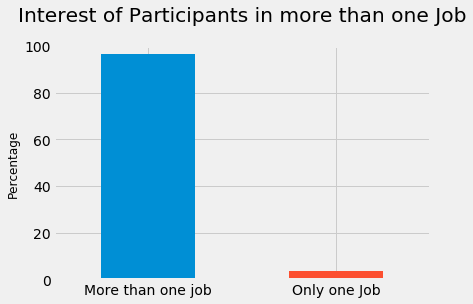

In [10]:
# Graph of 'multipleJobs_perc' serie
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

multipleJobs_perc.plot.bar()
plt.title('Interest of Participants in more than one Job',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['More than one job', 'Only one Job'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

Although most people are interested in more than one jobs, the data sample is still representative as long as the percentage of web and mobile development jobs in the *'JobRoleInterest'* column is higher that the rest of the jobs of interest. This is because, as previously mentioned, of one hand the courses are more on web and mobile development but, on the other hand, other domains are covered too; so in general having participants with a wide range of interest is convenient for or market.

It is now important to also evaluate the interest of participants in web and mobile development specifically.

In [11]:
# Collect participants with interests in web and or mobile development.
job_of_interest = jobs.index.str.contains('Web Developer|Mobile Developer')

In [12]:
# Count number of 'False' and 'True' values in 'job_of_interest' 
# Store this information in an array to give as input to a serie
interest = []
interest.append(float(np.unique(job_of_interest, return_counts=True)[1][1]*100)/float(len(job_of_interest)))
interest.append(float(np.unique(job_of_interest, return_counts=True)[1][0]*100)/float(len(job_of_interest)))
job_of_interest_perc= pd.Series(interest)

In [13]:
job_of_interest_perc

0    90.81855
1     9.18145
dtype: float64

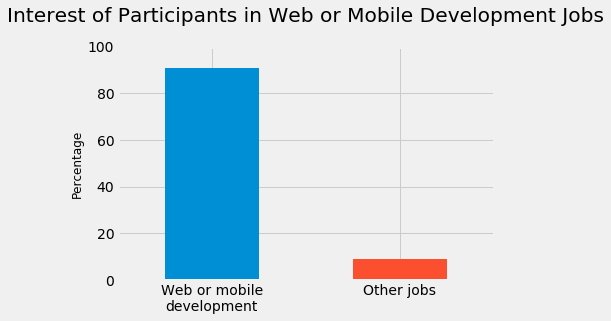

In [14]:
# Graph of 'job_of_interest_perc' serie
job_of_interest_perc.plot.bar()
plt.title('Interest of Participants in Web or Mobile Development Jobs',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other jobs'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

In [15]:
# Compute percentage of participants interested in web and or mobile development respect to the rest
print('The percentage of participants interested in web and mobile development is : {} %'.format(job_of_interest_perc[0]))

The percentage of participants interested in web and mobile development is : 90.8185496421 %


As you can see the percentage of participants interested in web development is quite high, which means that our data sample is consistent with our goal.

## Find out countries with high percentage of coders

Let us now evaluate where the new coders are located and what are the densities for each location. We can use the *'CountryLive'* variable for this purpose.

In [16]:
df_perc_liv = df['CountryLive'].value_counts(normalize = True).to_frame()[0:4]*100
df_perc_liv.columns = ['Percentage of New Coders']
df_perc_liv

,Percentage of New Coders
United States of America,45.700497
India,7.721556
United Kingdom,4.606610
Canada,3.802281


From the previous freqeuncy table it is possible to observe that the country where new coders are highly located is United States of America (46%), followed by India (7.7%), United Kingdom (4.6%) and Canada (3.8%).

## Money spent for learning

 If, on one hand, the information related to the country from where most of the particpants live is useful to start evaluating the possible markets of interest for our business, on the other hand it may be important to also consider how much money new coders are actually willing to spend on learning. Indeed advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us. 
In our dataset the column *'MoneyForLearning'* contains exactly the information we are interesetd in: it describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. In particular since our company sells subscriptions with a specific prize per month ($59), we're interested in finding out how much money each student spends per month. 
We will then analyze the *'MoneyForLearning'* column only for participants living in USA, India, UK and Canada both because these countries are the ones with highest number of coders and also because their official language is English that is also the language used for our courses. 

In [17]:
# Compute 'MoneyPerMonth' from 'MoneyForLearning'
df['MonthsProgramming'] = df['MonthsProgramming'].replace(0, 1)
df['MoneyPerMonth'] = df['MoneyForLearning']/df['MonthsProgramming']

In [18]:
# Check whether there are some NaN values
df['MoneyPerMonth'].isna().sum(), df['CountryLive'].isna().sum()

(675, 154)

In [19]:
# Remove null values from 'MoneyPerMonth' and 'CountryLive' columns 
df = df[pd.notnull(df['MoneyPerMonth'])]
df = df[pd.notnull(df['CountryLive'])]

In [20]:
# Let us consider only the 4 countries of interest
countries = ['United States of America', 'Canada', 'India', 'United Kingdom']
df = df[df['CountryLive'].apply(lambda x: x in countries)]

Let us look at the distribution of *'MoneyPerMonth'* in each of the 4 countries of interest.

In [21]:
# Select MoneyPerMonth for each contry and collect them in a new dataframe 'moneyMonth'
moneyMonth = pd.DataFrame()
moneyMonth['US'] = df[df['CountryLive'] == 'United States of America']['MoneyPerMonth'].reset_index(drop=True)
moneyMonth['UK'] = df[df['CountryLive'] == 'United Kingdom']['MoneyPerMonth'].reset_index(drop=True)
moneyMonth['Canada'] = df[df['CountryLive'] == 'Canada']['MoneyPerMonth'].reset_index(drop=True)
moneyMonth['India'] = df[df['CountryLive'] == 'India']['MoneyPerMonth'].reset_index(drop=True)

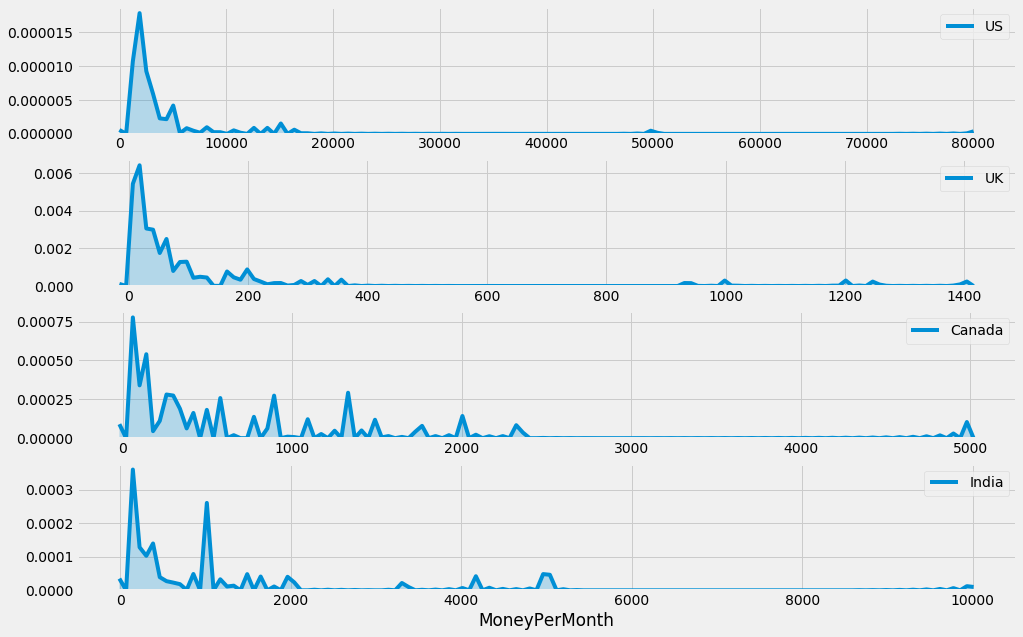

In [22]:
# Show the distributions
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15,10))#sharex=True
sns.kdeplot(moneyMonth["US"], shade = True, ax=ax1)
sns.kdeplot(moneyMonth["UK"], shade = True, ax=ax2)
sns.kdeplot(moneyMonth["Canada"], shade = True, ax=ax3)
sns.kdeplot(moneyMonth["India"], shade = True, ax=ax4)
plt.xlabel("MoneyPerMonth")
plt.show()

By grouping the dataframe with respect to CountryLive we could evaluate the average amount of money students spend in the 4 countries of interest.

In [23]:
mean_moneySpent = df.groupby(['CountryLive'])['MoneyPerMonth'].mean().to_frame().sort_values(by='MoneyPerMonth', ascending=False)

In [24]:
mean_moneySpent

,MoneyPerMonth
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


The obtained results look unespected especially for the low value associated to the United kingdom compared to the one for India. This can be explained by looking at the distributions of *'MoneyPerMonth'* spent by students who live in the 4 countries under analysis. Indeed here one can find several outliers that can be due to different reasons (e.g. errors in answering) and that can influence the mean of these distributions. To better consider those outliers one can refer to the box plots, as follows:

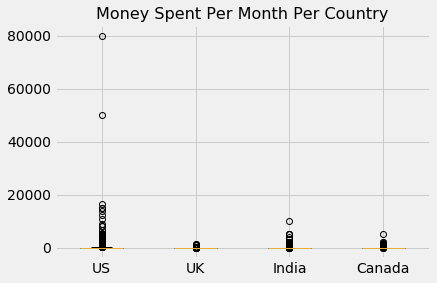

In [25]:
# Box plot of money spent per country
fig, ax = plt.subplots()
box = moneyMonth.boxplot(column=['US', 'UK', 'India', 'Canada'], ax=ax)
#ax.set_ylim(-50, 500) 
plt.title('Money Spent Per Month Per Country',
         fontsize = 16)
plt.show()

From this boxplot it is clear that there are outliers in the US distribution for values above $20000. One can also investigate these outliers more in details by looking at the original dataframe.

In [26]:
# Checking the answers given by participants who indicated a total amount of money spent for learning greater 
df_reduced_us = df[(df['CountryLive'] == 'United States of America') & (df['MoneyPerMonth']>20000)]
df_reduced_us

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,trans,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,40.0,b84e33311d235660ad1b7a918d7d7df4,b3229f43317af29a4d23734f9d543222,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home,English,"single, never married",100000.0,2.0,befcbda814,2017-03-10 23:30:16,2017-03-10 23:26:33,2017-03-10 23:31:50,2017-03-10 23:30:19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,"some college credit, no degree",NaN,48000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,30000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,20.0,11d884a40e5662ef57566556206b7754,4f77cc788154cb155fb513ece8ea40da,NaN,0.0,0.0,0.0,NaN,I'm already applying,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,work for a nonprofit,0.0,"Back-End Web Developer, Front-End Web Develo...",in an office with other developers,English,"single, never married",80000.0,1.0,b01f8f18a7,2017-03-16 23:14:34,2017-03-16 23:09:32,2017-03-16 23:16:45,2017-03-16 23:14:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bache

As you can see, there are only two participants, living in the US, who indicated to spend more than 20000 dollars for learning. This is highly unlikely given that one of them did not attended to any bootcamps or code events while the other one participated only to one bootcamp that is still not ended. We can for these reasons remove those outliers. 

In [27]:
# Remove outliers from US distribution
moneyMonth_US = moneyMonth[moneyMonth["US"]<20000]['US']

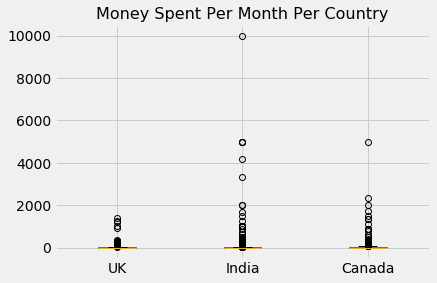

In [28]:
# Box plot of money spent per country
fig, ax = plt.subplots()
box = moneyMonth.boxplot(column=['UK', 'India', 'Canada'], ax=ax)
#ax.set_ylim(-50, 500) 
plt.title('Money Spent Per Month Per Country',
         fontsize = 16)
plt.show()

Possible outliers can be found in India and Canada for values greater than 3000 dollars. Also for the country 'UK' it looks like we have outliers for money spent greater than $500. In order to evaluate whether we can consider those points outliers, we need to have a close look at the original dataframe.

In [29]:
# Select values of 'United Kingdom' country with 'MoneyPerMonth' greater than 500
df_reduced_uk = df[(df['CountryLive'] == 'United Kingdom') & (df['MoneyPerMonth']>500)]
df_reduced_uk

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
3645,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Czech Republic,United Kingdom,NaN,NaN,Not working and not looking for work,NaN,25000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,NaN,21.0,4e44f8d6bb0d74b974c29b9c188bd684,07a06de301d06ce7e960b8713598db5b,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a startup,1.0,Front-End Web Developer,in an office with other developers,Czech,"single, never married",1200.0,1.0,d4bb652514,2017-03-12 20:30:49,2017-03-12 19:25:10,2017-03-12 20:33:05,2017-03-12 20:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,"professional degree (MBA, MD, JD, etc.)",Economics,2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.00
6127,23.0,1.0,1.0,1.0,General Assembly,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slovakia,United Kingdom,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,40.0,f0e81c452041f52c3de4a32961a8de03,edff84bd0e257c32be2b54341d03ed21,NaN,0.0,0.0,0.0,NaN,I'm already applying,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,0.0,"Full-Stack Web Developer, Front-End Web Deve...",no preference,Slovak,"single, never married",10000.0,8.0,e0a09cc88d,2017-03-19 13:45:28,2017-03-19 13:41:54,2017-03-19 13:47:01,2017-03-19 13:45:32,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,high school diploma or equivalent (GED),NaN,8000.0

As we can see some participants did attend to bootcamps and in general it is not impossible for students leaving in UK to spend between 500 and 1500 dollars per month for learning; so we can decide to keep those samples.

In [30]:
# Select values of 'Canada' country with 'MoneyPerMonth' greater than 2500
df_reduced_canada = df[(df['CountryLive'] == 'Canada') & (df['MoneyPerMonth']>2500)]
df_reduced_canada

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Also here it is possible that the participant, who lives in Canada, did spend 5000 dollars per month to attend bootcamp and some code events, also because when indicated 'MoneyForLearning' he/she coherently reported 10000 dollars considering that he/she was programming from 2 months at the time of the survey. So we can keep the data.

In [31]:
df_reduced_india = df[(df['CountryLive'] == 'India') & (df['MoneyPerMonth']>2500)]
df_reduced_india

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,

In India the situation is quite strange: it is indicated that the 5 participants spend more that 2500 dollars per month without attending any bootcamps and not a lot of code events. This is even stranger if one consider that the average cost of living and for education in India per month is around 420 dollars, as reported by [The copras](https://www.thechopras.com/country/india/education-costs-in-india.html). So we can remove those samples.

In [32]:
# Remove outliers from India distributions
moneyMonth_Canada = moneyMonth['Canada']
moneyMonth_India = moneyMonth[moneyMonth["India"]<2500]['India']
moneyMonth_UK = moneyMonth['UK']

## Select two countries to invest

After the elimination of the individuated outliers, the average amount of money spent in each of the four countries is the following. 

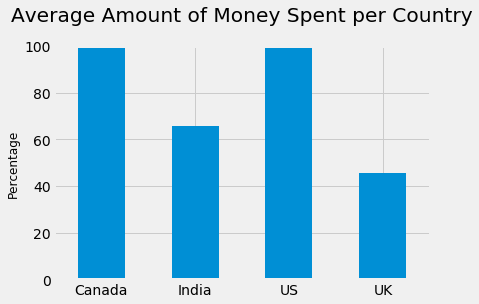

In [33]:
# Store average amount of money spent in each country 
d = {'Average Money Spent': [moneyMonth_Canada.mean(), moneyMonth_India.mean(), moneyMonth_US.mean(), moneyMonth_UK.mean() ]}

# Create dataframe
df_averageMoney = pd.DataFrame(data=d)
keys = ['Canada', 'India', 'US', 'UK']
df_averageMoney.index = keys

# Graph for the df_averageMoney
df_averageMoney.plot.bar(legend=None)
plt.title('Average Amount of Money Spent per Country',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1, 2, 3],keys,
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

In [34]:
df_averageMoney

,Average Money Spent
Canada,113.510961
India,65.758763
US,183.800110
UK,45.534443


Considering also the percentage of new coders, and thus new potential customers, for each country, as follows: 

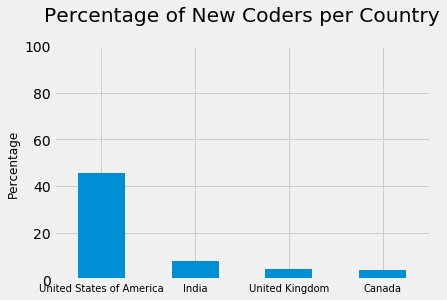

In [35]:
# Graph for the df_perc_liv
df_perc_liv.plot.bar(legend=None)
plt.title('Percentage of New Coders per Country',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1, 2, 3],df_perc_liv.index.values,fontsize = 10,
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

In [36]:
df_perc_liv

,Percentage of New Coders
United States of America,45.700497
India,7.721556
United Kingdom,4.606610
Canada,3.802281


#### Observations 

As shown in the *'Average Money Spent'* table, one country where our company should definitely spent for advertisement is the United States of America, where there is the highest amount of new coders (74%) and those new coders are more likely to spend an high amount of money, since they are already spending an average of 184 dollars per month for learning.

For the second market, although in Canada new coders are willing to spend more money to study (on average 114 dollars), the percentage of new coders is quite low (6%). The country with the highest percentage of new coders after the USA is India with 12% (which is two time more than the one for Canada) and the average amount of money they are willing to spend is 66 dollars which is in genral higher than the subscription price of the course we offer (which is 59 dollars per month). So in general if one would like to individuate a second market to invest, that would be India although the percentage of new coders is relatively smaller than the one in the USA.

## Conclusion
The goal of this project is to find out the two best markets to advise courses on programming offered by an e-learning company.
To accomplish this task we have first considered the **countries where there is a high percentage of new coders** and for those countries we looked at **how much new coders are willing to spend on learning**.

**United State of America** is one of the best market to advertise in courses on programming offered by an e-learning company. This is due to their high percentage of new coders (**75% of the coders on our data sample lives in US**) and to the fact those coders are willing to spend an high amount of money per month for learning (on average they are used to spend **184 dollars**). 

With respect to the second market it is not as clear as for the first one. India and Canada seem two good options: in both cases the average amount of money coders are willing to spend in learning is higher then the subscription price of the course the company under analysis offer (which is 59 dollars per month). However in India we can find a percentage of new coder that it two time the one in Canada (12% versus 6%); so between these two country perhaps India would be more suitable. 

**In any case given the important gap in the percentage of new coders between India and US we should probably split the advertising budget unequally (e.g. 70% in the US and 30% in India)**. 